# 1. 텍스트 전처리, Text Preprocessing
---
* 문제의 용도에 맞게 텍스트를 사전에 처리하는 작업
    - 요리 재료를 손질하는 과정
    
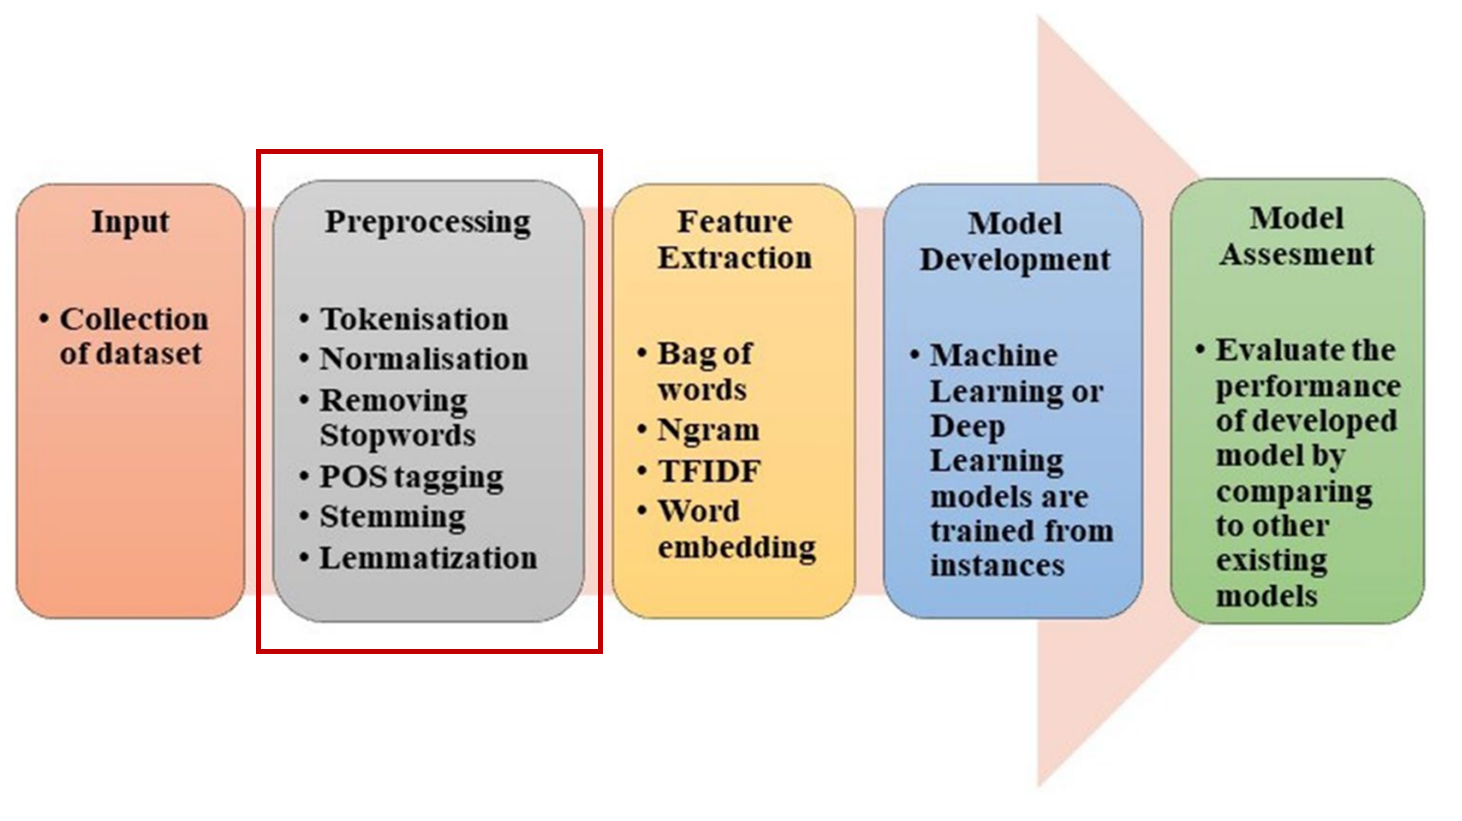

## 텍스트 전처리에서 하는 일
* **토근화 (Tokenization)** :데이터를 의미있는 기본 단위로 분리하는 작업
* **정제 (Cleaning)** : 불필요한 기호나 문자를 제거하는 작업
* **정규화 (Normalization)** : 형태가 다른 단어를 하나의 형태를 통합하는 작업. 대/소문자 통합, 유사의미 단어통합
* **어간 추출 (Stemming), 표제어 추출 (Lemmatization)** : 다양한 단어의 형태에서 어간/표제어와 같은 기본 형태를 추출
* **불용어 (Stopwords) 제거** : 조사, 관사, 접미사처럼 분석할 의미가 없는 토큰을 제거
* **품사 태깅 (POS tagging)** : 형태소를 분석하고, 형태소의 뜻과 문맥을 고려하여 품사를 붙이는 것

## 텍스트 전처리를 위한 자연어 처리 라이브러리
### NLTK (Natural Language Toolkit)
* 자연어처리를 위한 파이썬 라이브러리
* 토큰화, 어간 추출, 표제어 추출, 불용어 제거, 품사 태깅 등의 기능 텍스트 전처리 제공
* 언어 모델링, 품사 태깅, 구문 분석, 기계 학습, 통계 분석 등 다양한 NLP 작업을 지원
* 아나콘다 설치 시 같이 설치됨. NLTK의 기능을 제대로 사용하기 위해 기능에 맞는 NLTK Data를 추가 설치해야 함

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.__version__

### KoNLPy
* 한국어 자연어처리를 위한 파이썬 라이브러리
* 한국어 토큰화, 품사 태깅, 불용어 처리 등의 기능 제공
* 다양한 형태소 분석기 제공 : MeCab, Kkma, Komoran, Hannanum, Okt(구 Twitter) 등
* 대한민국 헌법, 대한민국 국회 의안, Naver 영화 리뷰 등의 한국어 말뭉치를 제공
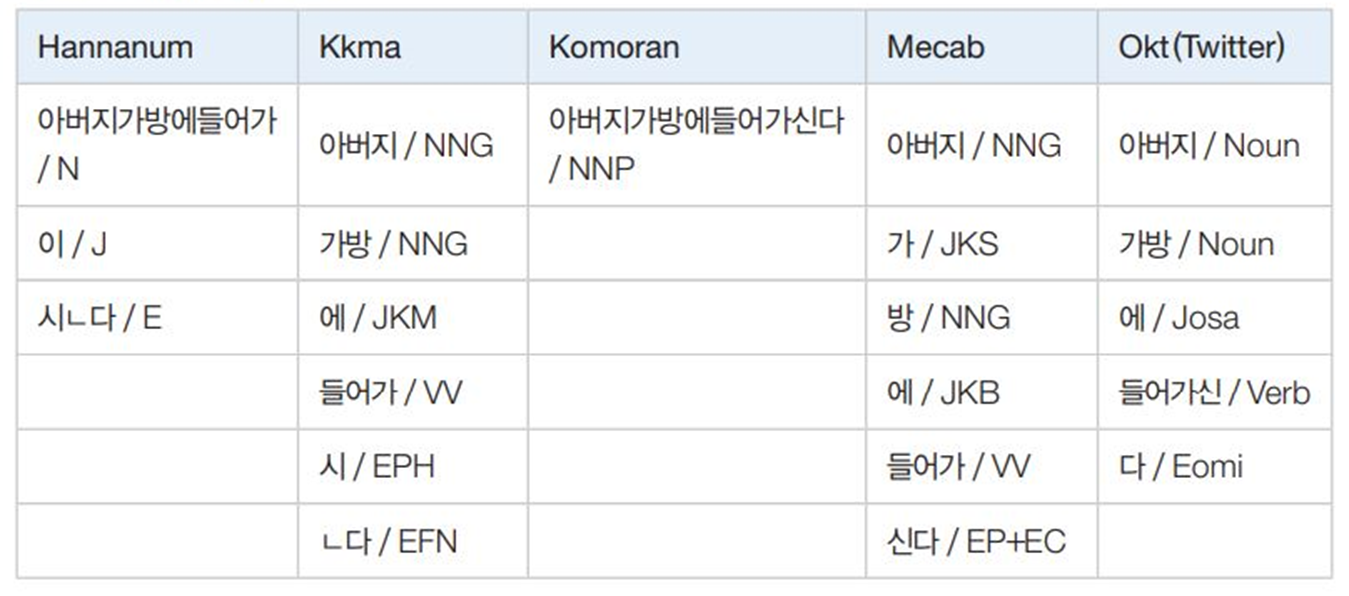

In [ ]:
!pip install konlpy

In [ ]:
import konlpy
konlpy.__version__

## Keras
* 딥 러닝 프레임워크인 텐서플로우에 대한 추상화 된 API를 제공
* 케라스를 설치 후에 사용할 수도 있지만, 텐서플로우에서 케라스를 사용할 수도 있음
    - 케라스 개발자인 프랑소와 숄레(François Chollet)는 앞으로는 keras보다는 tensorflow.keras를 사용할 것을 권장
* Keras의 자연어처리 기능 : 토큰화, 패딩, 사전훈련된 Word Embedding

## Tensorflow
* 구글이 2015년에 공개한 머신 러닝 오픈소스 라이브러리
* 머신 러닝과 딥 러닝을 직관적이고 손쉽게 할 수 있도록 설계

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
tf.__version__

In [ ]:
!pip install keras

In [ ]:
import keras
keras.__version__

## 1-1. 토근화 (Tokenization)

* 데이터를 의미있는 기본 단위로 분리하는 작업

#### 단어 토큰화
* 단어(word) 단위로 토큰화
* 일반적으로 구두점과 공백 단위로 토큰화

#### 문장 토큰화
* 토큰의 단위가 문장일 경우
* 문장 분류 (Sentence Segmentation)

### nltk.work_tokenize, nltk.sent_tokenize
- 사전에 학습된 tokenize를 사용하여 다른 언어도 tokenize 가능. 한국어는 사전 학습된 tokenizer가 없음

In [ ]:
#nltk data 설치
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize

sent = "Hello everyone. It's good to see you. Let's start out text mining class!"
print('단어 토큰화 :', word_tokenize(sent))
print('문장 토큰화 :', sent_tokenize(sent))

In [ ]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()
print('트리뱅크 워드토크나이저 :',tokenizer.tokenize(sent))

In [ ]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
sent = "Hello everyone. It's good to see you. Let's start out text mining class!"
print('단어 토큰화 :',text_to_word_sequence(sent))

### 한국어 토큰화 : konlpy

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize
sent_kor = "안녕하세요, 여러분. 만나서 반갑습니다. 지금부터 텍스트마이닝 수업을 시작하겠습니다."
print('문장 토큰화 :', sent_tokenize(sent_kor))
print('단어 토큰화 :', word_tokenize(sent_kor))
print('단어 토큰화 :', text_to_word_sequence(sent_kor))

In [ ]:
from konlpy.tag import Okt
okt = Okt()
sent_kor = "안녕하세요, 여러분. 만나서 반갑습니다. 지금부터 텍스트마이닝 수업을 시작하겠습니다."
print('OKT 형태소 분석 :', okt.morphs(sent_kor))
#print('OKT 품사 태깅 :', okt.pos(sent_kor))
#print('OKT 명사 추출 :', okt.nouns(sent_kor)) 

In [ ]:
from konlpy.tag import Kkma
kkma = Kkma()
print('꼬꼬마 형태소 분석 :',kkma.morphs(sent_kor))
#print('꼬꼬마 품사 태깅 :', kkma.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
#print('꼬꼬마 명사 추출 :', kkma.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))  

## 1-2. 정제 (Cleaning), 정규화 (Normalization)

In [ ]:
# 한글 이외의 문자는 공백으로 변환 (정규표현식 이용)
import re
train_df['document'] = train_df['document'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ", x))
train_df.head()

In [ ]:
# 중복값 제거

In [ ]:
# 결측치 제거

In [ ]:
# 불필요한 단어 제거 (길이가 짤은 단어 등)
import re
text = "I was wondering if anyone out there could enlighten me on this car."

# 길이가 1~2인 단어들을 정규 표현식을 이용하여 삭제
shortword = re.compile(r'\W*\b\w{1,2}\b')
print(shortword.sub('', text))

## 1-3. 어간 추출 (Stemming)

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
print(stemmer.stem('cooking'), stemmer.stem('cookery'), stemmer.stem('cookbooks'))

In [ ]:
from nltk.tokenize import word_tokenize

para = "Hello everyone. It's good to see you. Let's start our text mining class!"
tokens = word_tokenize(para) #토큰화 실행
print(tokens)
result = [stemmer.stem(token) for token in tokens] #모든 토큰에 대해 스테밍 실행
print(result)

In [ ]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
print(stemmer.stem('cooking'), stemmer.stem('cookery'), stemmer.stem('cookbooks'))

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()

words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
print('어간 추출 전 :', words)
print('포터 스테머의 어간 추출 후:',[porter_stemmer.stem(w) for w in words])
print('랭커스터 스테머의 어간 추출 후:',[lancaster_stemmer.stem(w) for w in words])

## 1-4. 표제어 추출 (Lemmatization)

In [ ]:
import nltk
nltk.download('omw-1.4')

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('cooking'))
print(lemmatizer.lemmatize('cooking', pos='v')) #품사를 지정
print(lemmatizer.lemmatize('cookery'))
print(lemmatizer.lemmatize('cookbooks'))

In [ ]:
#comparison of lemmatizing and stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
print('stemming result:', stemmer.stem('believes'))
print('lemmatizing result:', lemmatizer.lemmatize('believes'))
print('lemmatizing result:', lemmatizer.lemmatize('believes', pos='v'))

## 1-5. 불용어 제거

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords               #일반적으로 분석대상이 아닌 단어들
english_stops = set(stopwords.words('english')) #반복이 되지 않도록 set으로 변환

text1 = "Sorry, I couldn't go to movie yesterday."

tokens = word_tokenize(text1)

result = [word for word in tokens if word not in english_stops] #stopwords를 제외한 단어들만으로 list를 생성
print('불용어 제거 전 :',tokens) 
print('불용어 제거 후 :',result)

In [ ]:
print(english_stops)

In [ ]:
#자신만의 stopwords를 만들고 이용, #한글처리에서도 유용하게 사용할 수 있음
my_stopword = ['i', 'go', 'to'] #나만의 stopword를 리스트로 정의
result = [word for word in tokens if word not in my_stopword] 
print(result)

In [ ]:
from konlpy.tag import Okt
okt = Okt()

example = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."
stop_words = "를 아무렇게나 구 우려 고 안 돼 같은 게 구울 때 는"

stop_words = set(stop_words.split(' '))
word_tokens = okt.morphs(example)

result = [word for word in word_tokens if not word in stop_words]

print('불용어 제거 전 :',word_tokens) 
print('불용어 제거 후 :',result)

## 1-6. 품사 태깅 (POS tagging)

### 1-6-1. NLTK 활용 품사 태깅

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

tokens = word_tokenize("Hello everyone. It's good to see you. Let's start our text mining class!")
print(nltk.pos_tag(tokens))

In [ ]:
import nltk
nltk.download('tagsets')

In [ ]:
nltk.help.upenn_tagset('POS')

In [ ]:
# 원하는 품사의 단어들만 추출
my_tag_set = ['NN', 'VB', 'JJ']
my_words = [word for word, tag in nltk.pos_tag(tokens) if tag in my_tag_set]
print(my_words)

### 1-6-2. 한글 형태소 분석과 품사 태깅

In [ ]:
sentence = '''절망의 반대가 희망은 아니다.
어두운 밤하늘에 별이 빛나듯
희망은 절망 속에 싹트는 거지
만약에 우리가 희망함이 적다면
그 누가 세상을 비출어줄까.
정희성, 희망 공부'''

In [ ]:
tokens = word_tokenize(sentence)
print(tokens)
print(nltk.pos_tag(tokens))

In [ ]:
from konlpy.tag import Okt
t = Okt()
print('형태소 분석:', t.morphs(sentence))
print()
print('품사 태깅 결과:', t.pos(sentence))

In [ ]:
print('명사 추출:', t.nouns(sentence))

In [ ]:
from konlpy.tag import Kkma
kkma = Kkma()
print('꼬꼬마 형태소 분석 :',kkma.morphs(sentence))
print()
print('꼬꼬마 품사 태깅 :', kkma.pos(sentence))
print()
print('꼬꼬마 명사 추출 :', kkma.nouns(sentence))  